**PIPELINE**

In [3]:
import pandas as pd
import numpy as np
from AD_Package import trees_to_one
from AD_Package import panda_plus_symmetry as ps
import eric_functions as ef
import os
import platform
import crossmatch_functions as cmf

import random_selection as rs
import matplotlib.pyplot as plt

In [4]:
num_trees=100 #number of trees it will select randomly

#Location of files of all trees, and files of n randomly selected trees
input_file_path1 = 'TreeData/TreeData1/gts_dendropy_CAT_(((AB)C)D)_tauAB-10000_tauABC-20000_tauRoot-30000_pAB-10000_pABC-10000_pRoot-10000'
output_file_path1 = 'TreeTestingData/TestingData1/TestingData1.txt'

input_file_path2 = 'TreeData/TreeData2/gts_dendropy_CAT_tauAB-10000_tauABC-20000_tauRoot-25000_pAB-10000_pABC-10000_pRoot-10000'
output_file_path2 = 'TreeTestingData/TestingData2/TestingData2.txt'


pvalues_list = [] #where p-values are going to be saved

In [5]:
#Full Pipeline

#main_script function does the complete pipeline of the hypothesis test (merges the input files,
#creates a comparison [of distances] file, creates the symmetric matrix and does the crossmatch test).

#Input = two files that contain the trees you desire to test, number of repetitions and number of trees in total for the two files
#Output = List of results from crossmatch test in this order: [a1,Ea1,Va1,dev,pval,approx]

In [6]:
def main_script(symphy_tree_folder1,symphy_tree_folder2, number_of_repetitions,number_of_trees):
#------------------------------------------------------------------------------------------------------------------------
    # Change these variables)(really just the slashes since this might not work on windows)
    system = platform.platform() # what platform are you on
    slash =  "/"
    if system.__contains__("Windows"):
        slash =  "/"


    tree_pathName_folder1 = "TreeTestingData{}{}".format(slash,symphy_tree_folder1,slash)
    tree_pathName_folder2 = "TreeTestingData{}{}".format(slash,symphy_tree_folder2,slash)
    full_tree_folder_path = "TreeTestingData{}trees_to_one_out".format(slash)

#    print(tree_pathName_folder1)

    header = "-------------------------------TESTING FOR Folders: {} VS {} LOADING-------------------------------------".format(symphy_tree_folder1,symphy_tree_folder2 )

    folder_dir = "{}".format(slash)
    distance_type = 'weighted_distance'
    col_names = ['a1', 'Ea1', 'Va1','dev',"pval","approxpval"]


    generate_tree_path = folder_dir + "SimMlTrees304_"
    r_tree2 = "(Gonyosoma_frenatum:0.00016709345823387125,(Gonyosoma_boulengeri:0.0001352593483205748,(Gonyosoma_prasinum:0.0001484060384921806,(Gonyosoma_oxycephalum:0.00029840061611430187,((Hapsidophrys_lineatus:0.0002279388109971766,Hemorrhois_ravergieri:0.00014262643010240573):0.0002019981516487881,(Nerodia_sipedon:0.00014010052567203936,((Coelegnathus_helena:9.94911915841639e-05,(Coelognathus_radiatus:0.00020636164678921814,(Coelognathus_erythrurus:0.00023812838814190986,(Coelognathus_flavolineatus:0.00013301378204772684,Coelognathis_subradiatus:9.58430137897503e-05):0.0002775763508092348):0.00020336145573815025):0.0001871793735610874):0.00017802936484490454,(((Euprepiophis_mandarinus:0.00014207178030065153,(Euprepiophis_conspicillatus:0.0001620515586755933,Euprepiophis_perlaceus:0.00014126122879252865):0.0002259287623448453):0.0002080937623204843,((Oreocryptophis_porphyraceus:0.00020592701636988118,Archelaphe_bella:0.000107290453233645):0.00038811791274092147,((Elaphe_zoigeensis:0.00011463782694029827,((Orthriophis_moellendorffi:0.00019878282375978458,(Orthriophis_cantoris:0.00023237114048921443,Orthriophis_hodgsoni:0.0002085451139408275):0.00019747942624252852):8.277040744182492e-05,(Orthriophis_taeniurus:0.00011291944987485439,(Elaphe_quatuorlineata:0.00012163254611438352,((Elaphe_climacophora:0.0002814097353607031,(Elaphe_anomala:0.0001143729158869478,Elaphe_schrenckii:0.0002746811946230307):0.0001813733598026775):0.00023287377497532968,((Elaphe_bimaculata:0.00013318334321119895,Elaphe_dione:0.00028829842284573833):0.00025284185596994126,(Elaphe_davidi:0.0001872799025191012,(Elaphe_quadrivirgata:0.00022165323948825956,Elaphe_carinata:0.00014009198834251635):0.00014421234884787456):0.0002211450073109886):0.0002726836600716798):0.000363919996536562):0.00010331756054011526):9.35383365811014e-05):0.00012821620460451346):0.000121666705452556,(((Oocatochus_rufodorsatus:0.0002747680613845826,(Coronella_austriaca:0.0002294982221147942,Coronella_girondica:0.00011910608979643397):0.00020962560388212734):0.00012210955112446225,(Zamenis_hohenackeri:0.00021583886386209914,(Rhinechis_scalaris:0.00019975265521595683,(Zamenis_persicus:0.00027818993115484423,(Zamenis_situla:0.0001962392122976544,(Zamenis_longissimus:9.707268276134054e-05,Zamenis_lineatus:0.00018171671324664315):0.00019265523503594862):0.00024137402126686916):0.00020598642693125968):0.00016464827899441978):0.0002596668814780901):0.00014565617198129311,(Senticolis_triaspis:0.000183032421114866,((Pseudelaphe_flavirufa:8.76155280571277e-05,(Bogertophis_rosaliae:0.0001749595764255417,Bogertophis_subocularis:0.00020687020307686327):0.00012610465465207776):0.00021000668473416837,((((Pituophis_deppei:0.00023809839679068205,Pituophis_lineaticollis:0.00017752509750829128):6.991244027259497e-05,((Pituophis_vertebralis:9.63824133371477e-05,Pituophis_catenifer:0.00023800673640256054):0.00020968747189442145,(Pituophis_ruthveni:0.00020387796936408478,Pituophis_melanoleucus:0.00013835146535166775):0.0001207034575909236):0.00020382887538695227):0.0002373808444666213,((Pantherophis_guttatus:0.00033095230400511825,(Pantherophis_emoryi:0.00019477923193029895,Pantherophis_slowinskii:0.00019439792481519013):0.00032242293030238574):0.0002316159837400963,(Pantherophis_ramspotti:0.00025964733488268853,(Pantherophis_spiloides:0.00024208536079568704,(Pantherophis_obsoletus:9.19267262764644e-05,Pantherophis_bairdi:0.00022579973499859568):0.00020243352492125226):0.0003541109493367164):0.00017894550504262755):0.000252015961908349):0.00020899002937093693,(Arizona_elegans:0.0001607933722083523,(Rhinocheilus_lecontei:0.0002507031287068399,(Cemophora_coccinea:0.00019982253770263142,(((Lampropeltis_extenuata:0.00016728132917143292,(Lampropeltis_rhombomaculata:0.0002064492658254164,Lampropeltis_calligaster:0.00021819398486458335):0.00022453640826815318):0.00013819732200818626,(Lampropeltis_getula:0.00018357566216514672,(Lampropeltis_nigra:0.00018160151808268248,(Lampropeltis_holbrooki:0.00023090731126665742,(Lampropeltis_californiae:0.00021848736320320401,Lampropeltis_splendida:0.0002119783410452386):0.00019179281137167065):0.0001194137510606942):0.00016863043993242894):0.0002137271196253215):0.0002083464058616576,((Lampropeltis_elapsoides:0.00029078252477833137,(Lampropeltis_annulata:0.00021331592646987258,Lampropeltis_gentilis:0.00013500948600549207):0.0001860077363069921):0.0002632480395204761,((Lampropeltis_polyzona:0.0001292197907848558,(Lampropeltis_abnorma:0.00019160851942519943,Lampropeltis_micropholis:0.00012144229485021954):0.00028938502057492004):0.00026258927570018515,((Lampropeltis_webbi:0.00029260184395871647,(Lampropeltis_mexicana:0.00028944580082178556,Lampropeltis_ruthveni:9.946379859807918e-05):0.00021100599205720825):0.00014887208724998296,(Lampropeltis_alterna:0.00012576198881003432,((Lampropeltis_zonata:0.0001583501071690814,Lampropeltis_multifasciata:0.00021409753750141434):0.00016453524449240928,(Lampropeltis_knoblochi:0.0002954776553769234,Lampropeltis_pyromelana:7.934758443870134e-05):0.00020962727374904008):0.00020924478541370996):0.00031542732597001494):0.0002506532038133842):0.00018880736614822799):0.000239268953063874):0.00010379152912796926):0.00013636561795731257):0.00014267386503580732):0.00010602226665807981):0.0001222639769576057):0.00013320678256334857):0.00010194942015505504):0.0001966385627180895):0.00012400755970604424):0.00014577628683738427):0.0001793948765069604,(Ptyas_mucosa:0.0002327052323615252,((Coluber_constrictor:5.0591129051981765e-05,(Gyalopion_canum:0.00020669082647665265,Tantilla_coronata:0.000180326404435288):0.00016417347071117754):0.00024842025789677106,Drymobius_margaritiferus:8.721133668046602e-05):0.00030253716466275215):0.0004689982008216632):0.00023021436691829952):0.00024476698087054835):0.00024984283783707685):0.00017745965006261678):0.00016255467184536117):0.00019213678043572042));"

# ---------------------------------------------------------------------------------------------------------------------

    #files location

    file_num_1 = folder_dir + "TestingData1.txt"
    file_num_2 = folder_dir + "TestingData2.txt"

#    print(file_num_1)

    #folder_trees_1 = folder_dir + tree_pathName_folder1
   # folder_trees_2 = folder_dir + tree_pathName_folder2
    #full_tree_folder = folder_dir + full_tree_folder_path

    folder_trees_1 =  tree_pathName_folder1
    folder_trees_2 =  tree_pathName_folder2
    full_tree_folder =  full_tree_folder_path

    merged_file_output =  "Merged_trees"
    symMat_output_dir =  "SymmetricMatrix_"

    cross_data = pd.DataFrame(0, index= range(0,number_of_repetitions), columns = col_names)


    # symMat = pd.read_csv("./symmetricMatrix.csv", index_col=0,header = 0)
    # symMat2 = symMat.to_numpy()
    # symMat2
    # ---------------------------------------------------------------------------------------------------------------------

#        for h in range(0,number_of_repetitions):


     #PIPELINE CODE 6/14/2022

    print(header)
    # Merge Trees into one folder from symphy

    #    if not os.path.exists(file_num_1 + '{}.txt'.format((symphy_tree_folder1))) or not os.path.exists(file_num_1 + '{}.txt'.format((symphy_tree_folder1))):
    #        print("Merging Tree Files for run: ", h)

    #        trees_to_one.trees_to_one(folder_trees_1,folder_trees_2,number_of_trees,(file_num_1 + '{}.txt'.format((symphy_tree_folder1))),(file_num_2 + '{}.txt'.format((symphy_tree_folder1))))
    #    else:
     #       print("Merging ---Tree Files--- skipped for run: ", h)


    #merging files
    
    if not os.path.exists(folder_dir+ merged_file_output + '{}.txt'.format(h+1)):
        print("Merging Files for run: ", h)
        merged_file = ef.merge_files((tree_pathName_folder1 + file_num_1),(tree_pathName_folder2 + file_num_2),merged_file_output,(h+1))
    else: 
        print("Merging Files skipped for run: ", h)
        t_data = open(folder_dir+ merged_file_output + '{}.txt'.format(h+1))
        merged_file =  str(t_data.read())

#        print(merged_file)    
    

    #generate comparison files
    
    if not os.path.exists(folder_dir+ 'Sim_Trees_distances_comparisons_{}.csv'.format(h+1)):
        print("generating comparison file for run: ", h)
        print(distance_type)    
        comparison_df = ef.generate_comparison_files_simphy(merged_file,(h+1),distance_type)
#        print(comparison_df)
    else:
        print("generating comparison file skipped for run: ", h)
        comparison_df = pd.read_csv(folder_dir+ 'Sim_Trees_distances_comparisons_{}.csv'.format(h+1))
#        print(comparison_df)

    #Aliyah Symetric matrix function
    
    symMat_output_path = symMat_output_dir + "{}.csv".format((h+1))
    if not os.path.exists(symMat_output_path):
        print("Comparison DF")
#        print(comparison_df)
        print("generating symetric matrix for run: ", h)
        ps.panda_plus_symmetry_generate(comparison_df, number_of_trees,symMat_output_path)
        sym_mat = pd.read_csv(symMat_output_path,index_col=0,header = 0)
    else:
        print("generating symetrix matrix skipped for run: ", h)
        sym_mat = pd.read_csv(symMat_output_path,index_col=0,header = 0)
    sym_mat2 = sym_mat.to_numpy()

#     print(sym_mat2[34][35])
#     print(sym_mat2[35][34])
#     print(sym_mat2)

    print("calculating crossmatch for run: ", h)
    print("-----------------------------------------------------------------------------------------------\n")


#CROSSMATCH TEST

    vec = (np.repeat([0], len(sym_mat2)/2)).tolist() + (np.repeat([1], len(sym_mat2)/2)).tolist()

    values_list = cmf.crossmatchtest(vec,sym_mat2)

    print(values_list)

    print("\n")

    return values_list

In [7]:
for h in range (100):
    
#random selection of trees:
    
    random_lines1 = rs.select_random_lines(input_file_path1, num_trees) #takes input file (practice file for now)
    rs.save_lines_to_file(random_lines1, output_file_path1)  
    
    random_lines2 = rs.select_random_lines(input_file_path2, num_trees) #takes input file (practice file for now)
    rs.save_lines_to_file(random_lines2, output_file_path2)
    
    values_list = main_script("TestingData1","TestingData2",h,2*num_trees)
    
    pvalue=values_list[4]
    pvalues_list.append(pvalue)
    
    print("-----------------------------END---------------------------------------")
    print("\n")

-------------------------------TESTING FOR Folders: TestingData1 VS TestingData2 LOADING-------------------------------------
Merging Files for run:  0
generating comparison file for run:  0
weighted_distance
*********************************************
Comparison DF
generating symetric matrix for run:  0
calculating crossmatch for run:  0
-----------------------------------------------------------------------------------------------

total min weigth is:  478392.796074725
--------------------------------------------------------------------------
Results of crossmatch test:


a1:  36
Ea1:  50.25125628140704
Va1:  25.126269051555767
dev:  -2.8430804379933257
pval:  0.002749941940889765
approxpval:  0.0022339896281174834


[36, 50.25125628140704, 25.126269051555767, -2.8430804379933257, 0.002749941940889765, 0.0022339896281174834]


-----------------------------END---------------------------------------


-------------------------------TESTING FOR Folders: TestingData1 VS TestingData2 L

(array([64., 18.,  9.,  0.,  0.,  4.,  0.,  3.,  0.,  2.]),
 array([1.01881566e-07, 1.43687188e-02, 2.87373357e-02, 4.31059526e-02,
        5.74745696e-02, 7.18431865e-02, 8.62118034e-02, 1.00580420e-01,
        1.14949037e-01, 1.29317654e-01, 1.43686271e-01]),
 <BarContainer object of 10 artists>)

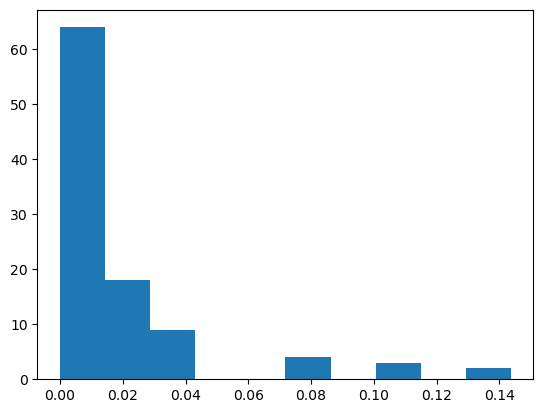

In [8]:
plt.hist(pvalues_list)

In [9]:
power = len([i for i in pvalues_list if i < 0.05])/len(pvalues_list)
print(power)

0.91
